In [1]:
using LinearAlgebra

In [51]:
using Images, Interact

In [52]:
download("http://news.stanford.edu/news/2009/may20/gifs/mem_golub.jpg","golub.jpg")

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  127k  100  127k    0     0   472k      0 --:--:-- --:--:-- --:--:--  471k


"golub.jpg"

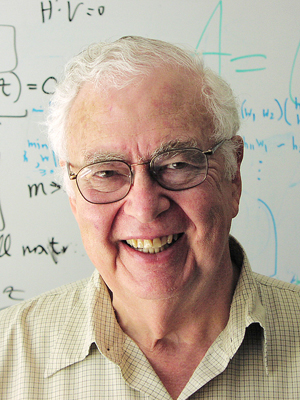

In [53]:
golub = load("golub.jpg")

In [54]:
download("https://events.boisestate.edu/wp-content/uploads/2017/03/NICK-TREFETHEN.jpg","nick.jpg")

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 12487  100 12487    0     0  24332      0 --:--:-- --:--:-- --:--:-- 24341


"nick.jpg"

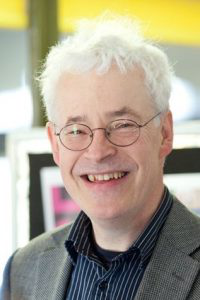

In [55]:
nick = load("nick.jpg")

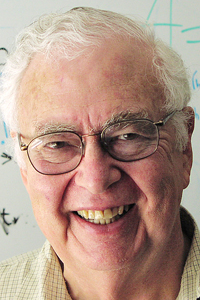

In [56]:
golub = golub[30:329,50:249]

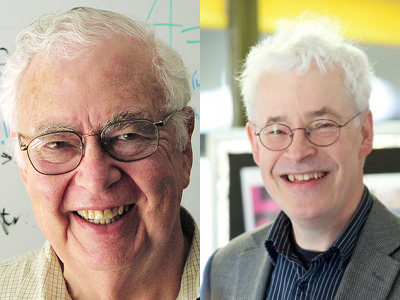

In [57]:
[golub nick]

In [58]:
golub_array = float.(channelview(golub))
nick_array  = float.(channelview(nick))

3×300×200 Array{Float32,3}:
[:, :, 1] =
 0.980392  0.980392  0.980392  0.984314  …  0.537255  0.517647  0.498039
 0.921569  0.921569  0.921569  0.92549      0.643137  0.623529  0.603922
 0.360784  0.360784  0.360784  0.364706     0.74902   0.729412  0.709804

[:, :, 2] =
 0.976471  0.980392  0.980392  0.984314  …  0.490196  0.478431  0.466667
 0.917647  0.921569  0.921569  0.92549      0.584314  0.572549  0.560784
 0.356863  0.360784  0.360784  0.364706     0.678431  0.666667  0.662745

[:, :, 3] =
 0.976471  0.976471  0.980392  0.980392  …  0.470588  0.466667  0.462745
 0.917647  0.917647  0.921569  0.921569     0.537255  0.533333  0.533333
 0.356863  0.356863  0.360784  0.360784     0.615686  0.611765  0.611765

...

[:, :, 198] =
 0.862745  0.87451  0.890196  0.901961  …  0.305882  0.333333  0.392157
 0.733333  0.74902  0.772549  0.788235     0.313726  0.341176  0.4     
 0.278431  0.27451  0.262745  0.254902     0.301961  0.329412  0.388235

[:, :, 199] =
 0.862745  0.870588  0.886

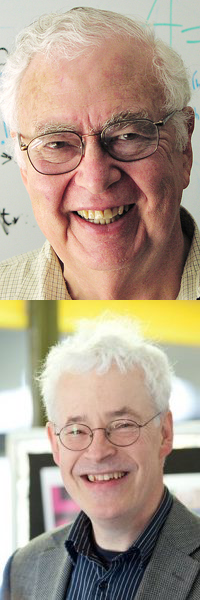

In [59]:
[golub;nick]

In [127]:
function gsvd_approx(A,B,start,k)

    U,V,Q,C,S,R0 = svd(A,B)
    H = R0*Q'
    println(size(H))
   
    ι = start:(start+k-1)
    
     AA = U[:,ι] * C[ι,ι] * H[ι, :]
     BB = V[:,ι] * S[ι,ι] * H[ι, :]
     AA = min.(max.(AA, 0.0), 1.)
     BB = min.(max.(BB, 0.0), 1.)
     [AA BB]
end

gsvd_approx (generic function with 2 methods)

(200, 200)
(200, 200)
(200, 200)


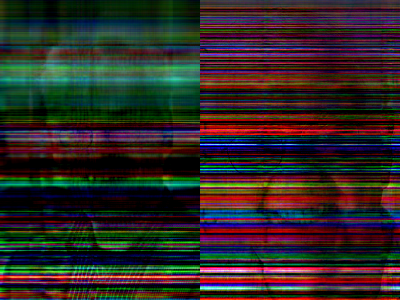

In [134]:
start=21
    colorview(  RGB, 
                gsvd_approx(nick_array[1,:,:], golub_array[1,:,:], start, 50),
                gsvd_approx(nick_array[2,:,:], golub_array[2,:,:], start, 50),
                gsvd_approx(nick_array[3,:,:], golub_array[3,:,:], start, 50)
    )


(200, 200)
(200, 200)
(200, 200)


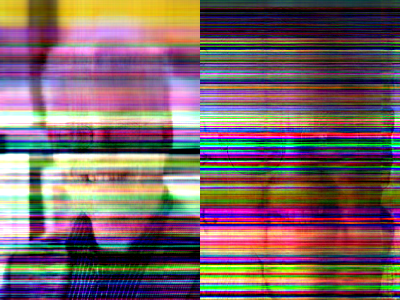

In [133]:
start=1
    colorview(  RGB, 
                gsvd_approx(nick_array[1,:,:], golub_array[1,:,:], start, 50),
                gsvd_approx(nick_array[2,:,:], golub_array[2,:,:], start, 50),
                gsvd_approx(nick_array[3,:,:], golub_array[3,:,:], start, 50)
    )
